### This code is for the NCBI/NLM Codeathon 2024 to identify genes that are expressed in the human gut, categorize them into groups, and compare their expression between healthy and colons isolated from IBD patients

In [1]:
install.packages("openxlsx")
install.packages("gplots")
install.packages("pheatmap")

Installing package into 'C:/Users/varun/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'openxlsx' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'openxlsx'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\varun\AppData\Local\R\win-library\4.4\00LOCK\openxlsx\libs\x64\openxlsx.dll to C:\Users\varun\AppData\Local\R\win-library\4.4\openxlsx\libs\x64\openxlsx.dll: Permission denied"
Warning message:
"restored 'openxlsx'"



The downloaded binary packages are in
	C:\Users\varun\AppData\Local\Temp\Rtmp8yvOkP\downloaded_packages


Installing package into 'C:/Users/varun/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\varun\AppData\Local\Temp\Rtmp8yvOkP\downloaded_packages


Installing package into 'C:/Users/varun/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\varun\AppData\Local\Temp\Rtmp8yvOkP\downloaded_packages


Corrected the spreadsheet due to the excel conversion of gene names on lines 8833 - 8845:

* 1-MAR -> MTARC1
* 2-MAR -> MTARC2
* 1-MAR -> MARCHF1
* 10-MAR -> MARCHF10
* 11-MAR -> MARCHF11
* 2-MAR -> MARCHF2
* 3-MAR -> MARCHF3
* 4-MAR -> MARCHF4
* 5-MAR -> MARCHF5
* 6-MAR -> MARCHF6
* 7-MAR -> MARCHF7
* 8-MAR -> MARCHF8
* 9-MAR -> MARCHF9

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9325790/

In [10]:
library(openxlsx)

file_path <- "../data/Priya_et_al_Supplementary_Tables/Supplementary Tables S12-S17.xlsx"

# getting data from sheets
sheets <- openxlsx::getSheetNames(file_path)
print(sheets)

data_frame <- lapply(sheets, openxlsx::read.xlsx, xlsxFile=file_path)
# assign names to data frame
names(data_frame) <- sheets

[1] "S12" "S13" "S14" "S15" "S16" "S17"


In [11]:
library(Matrix)

In [12]:
##Load gene expression matrix across patients
df <- data_frame$S12
head(df)

,X1,B01,B02,B03,B04,B05,B06,B07,B08,B09,⋯,s74,s85,s86,s87,s88,s89,s90,s94,s95,s96
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,235,815,351,629,91,175,1240,600,1325,⋯,1426,1230,206,809,103,1028,14,1985,369,291
2,TNMD,23,15,188,12,4,10,24,11,13,⋯,34,14,7,0,6,46,0,16,3,7
3,DPM1,184,166,146,124,150,121,536,212,237,⋯,299,345,283,325,223,327,29,606,344,198
4,SCYL3,263,389,185,231,480,340,432,335,559,⋯,546,267,298,529,250,416,91,428,493,287
5,C1orf112,98,73,69,70,457,106,233,109,114,⋯,289,198,133,323,103,178,10,247,289,115
6,FGR,111,144,370,53,287,40,114,40,9,⋯,38,62,64,90,89,32,29,68,113,137


In [13]:
genes.list <- df$X1
which(duplicated(genes.list) | duplicated(genes.list, fromLast = TRUE))


integer(0)

In [14]:
genes.list <- df$X1
rownames(df) <- genes.list
head(df)

,X1,B01,B02,B03,B04,B05,B06,B07,B08,B09,⋯,s74,s85,s86,s87,s88,s89,s90,s94,s95,s96
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,TSPAN6,235,815,351,629,91,175,1240,600,1325,⋯,1426,1230,206,809,103,1028,14,1985,369,291
TNMD,TNMD,23,15,188,12,4,10,24,11,13,⋯,34,14,7,0,6,46,0,16,3,7
DPM1,DPM1,184,166,146,124,150,121,536,212,237,⋯,299,345,283,325,223,327,29,606,344,198
SCYL3,SCYL3,263,389,185,231,480,340,432,335,559,⋯,546,267,298,529,250,416,91,428,493,287
C1orf112,C1orf112,98,73,69,70,457,106,233,109,114,⋯,289,198,133,323,103,178,10,247,289,115
FGR,FGR,111,144,370,53,287,40,114,40,9,⋯,38,62,64,90,89,32,29,68,113,137


In [ ]:
write.csv(df, "../data/human_gene_exp_IBD.csv")

In [17]:
df <- df[, -(1:1)]
head(df)

,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,⋯,s74,s85,s86,s87,s88,s89,s90,s94,s95,s96
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,815,351,629,91,175,1240,600,1325,672,2038,⋯,1426,1230,206,809,103,1028,14,1985,369,291
TNMD,15,188,12,4,10,24,11,13,8,8,⋯,34,14,7,0,6,46,0,16,3,7
DPM1,166,146,124,150,121,536,212,237,275,715,⋯,299,345,283,325,223,327,29,606,344,198
SCYL3,389,185,231,480,340,432,335,559,427,486,⋯,546,267,298,529,250,416,91,428,493,287
C1orf112,73,69,70,457,106,233,109,114,148,302,⋯,289,198,133,323,103,178,10,247,289,115
FGR,144,370,53,287,40,114,40,9,133,28,⋯,38,62,64,90,89,32,29,68,113,137


In [18]:
##Load the metadata
meta <- read.csv("../data/human/CRC_metadata.csv")

In [19]:
##Now change the column names of the dataframe from patient IDs to IBD vs nonIBD
new_column_names <- sapply(colnames(df), function (id){
  col_ids <- meta[which(meta$Tissue.RNA.DNA_Tube_ID == id), "Description"]
  return(col_ids)
})
# new_column_names

In [20]:
##Convert the list to a character vector
new_column_names <- unlist(new_column_names)

#Replace column names of dataframe
colnames(df) <- new_column_names

In [21]:
head(df)

,normal,tumor,normal.1,tumor.1,normal.2,tumor.2,normal.3,tumor.3,normal.4,tumor.4,⋯,tumor,tumor.1,normal,tumor.2,normal.1,tumor.3,normal.2,tumor.4,tumor.5,normal.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,815,351,629,91,175,1240,600,1325,672,2038,⋯,1426,1230,206,809,103,1028,14,1985,369,291
TNMD,15,188,12,4,10,24,11,13,8,8,⋯,34,14,7,0,6,46,0,16,3,7
DPM1,166,146,124,150,121,536,212,237,275,715,⋯,299,345,283,325,223,327,29,606,344,198
SCYL3,389,185,231,480,340,432,335,559,427,486,⋯,546,267,298,529,250,416,91,428,493,287
C1orf112,73,69,70,457,106,233,109,114,148,302,⋯,289,198,133,323,103,178,10,247,289,115
FGR,144,370,53,287,40,114,40,9,133,28,⋯,38,62,64,90,89,32,29,68,113,137


In [22]:
##Save new dataframe
write.csv(df, "../data/human_gene_exp_CRC_new.csv")

In [23]:
##Calculate mean expression for the 3 categories
##Isolate the three datasets to calculate the mean expression for each category
df.normal <- df[, which(colnames(df) == "normal")]
df.tumor <- df[, which(colnames(df) == "tumor")]


In [25]:
head(df.normal)

,normal,normal.1,normal.2,normal.3,normal.4,normal.5,normal.6,normal.7,normal.8,normal.9,⋯,normal.34,normal.35,normal.36,normal.37,normal.38,normal.39,normal.40,normal.41,normal.42,normal.43
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,815,629,175,600,672,561,153,217,227,586,⋯,448,140,199,357,182,587,206,103,14,291
TNMD,15,12,10,11,8,9,1,4,4,11,⋯,12,5,10,4,5,17,7,6,0,7
DPM1,166,124,121,212,275,202,90,123,146,224,⋯,121,368,108,137,66,287,283,223,29,198
SCYL3,389,231,340,335,427,334,262,216,185,319,⋯,527,377,256,348,287,563,298,250,91,287
C1orf112,73,70,106,109,148,93,72,58,61,67,⋯,89,171,67,94,75,143,133,103,10,115
FGR,144,53,40,40,133,74,79,66,145,27,⋯,52,56,85,85,22,50,64,89,29,137


In [26]:
head(df.tumor)

,tumor,tumor.1,tumor.2,tumor.3,tumor.4,tumor.5,tumor.6,tumor.7,tumor.8,tumor.9,⋯,tumor.33,tumor.34,tumor.35,tumor.36,tumor.37,tumor.38,tumor.39,tumor.40,tumor.41,tumor.42
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,351,91,1240,1325,2038,18,1208,463,1489,309,⋯,97,606,930,1340,1426,1230,809,1028,1985,369
TNMD,188,4,24,13,8,0,12,1,71,5,⋯,1,2,2,19,34,14,0,46,16,3
DPM1,146,150,536,237,715,322,477,204,245,157,⋯,115,556,343,515,299,345,325,327,606,344
SCYL3,185,480,432,559,486,403,335,267,319,286,⋯,132,229,430,390,546,267,529,416,428,493
C1orf112,69,457,233,114,302,761,178,174,151,192,⋯,72,151,256,271,289,198,323,178,247,289
FGR,370,287,114,9,28,358,22,73,27,431,⋯,48,87,154,203,38,62,90,32,68,113


In [ ]:
##Calculate mean
df.tumor$mean.exp <- rowMeans(df.tumor)
df.normal$mean.exp <- rowMeans(df.normal)


In [29]:
##Now cbind the mean expression columns
dx <- cbind(df.tumor$mean.exp, df.normal$mean.exp)
rownames(dx) <- rownames(df)
colnames(dx) <- c("tumor", "normal")

In [30]:
head(dx)

,tumor,normal
TSPAN6,923.62791,324.45455
TNMD,17.51163,14.72727
DPM1,340.88372,169.34091
SCYL3,374.48837,308.72727
C1orf112,232.44186,93.84091
FGR,125.44186,91.25000


In [31]:
##Now use this dataframe to make dotplots for specific sets of transporter genes
##Set the genes for which I will plot dotplots
abc.transporters <- grep("ABC", rownames(df), value = T)
slc.transporters <- grep("SLC", rownames(df), value = T)
aqp.transporters <- grep("AQP", rownames(df), value = T)
cyp.genes <- grep("CYP", rownames(df), value = T)
kcn.genes <- grep("KCN", rownames(df), value = T)
trpv.genes <- grep("TRPV", rownames(df), value = T)

In [32]:
get_gene_expression_data <- function(data, genes){
    t(data[genes,])
}

In [33]:
abc.gene_expression_data <- get_gene_expression_data(dx, abc.transporters)
slc.gene_expression_data <- get_gene_expression_data(dx, slc.transporters)
aqp.gene_expression_data <- get_gene_expression_data(dx, aqp.transporters)
cyp.gene_expression_data <- get_gene_expression_data(dx, cyp.genes)
kcn.gene_expression_data <- get_gene_expression_data(dx, kcn.genes)
trpv.gene_expression_data <- get_gene_expression_data(dx, trpv.genes)

In [34]:
# Plot the heatmap
library(gplots)

draw_heatmap <- function(data, gene_name) {
#     output_pdf = paste("../data/plots/", gene_name, ".pdf")
#     pdf(output_pdf, width = 24, height = 24)
#     pdf("../data/plots/TRPV_channels_transporter_heatmap.pdf", width = 24, height = 24)
    
    title = paste("Gene Expression Heatmap", "-", gene_name)
    heatmap.2(as.matrix(data),
          dendrogram = "none",      # Add dendrogram for rows
          trace = "none",          # Remove trace
          margins = c(10,10),      # Add margins
          col = hcl.colors(256, palette = "viridis"),  # Color scheme
          main = title,
          xlab = "Genes",
          ylab = "Conditions")    
#     dev.off()
}


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




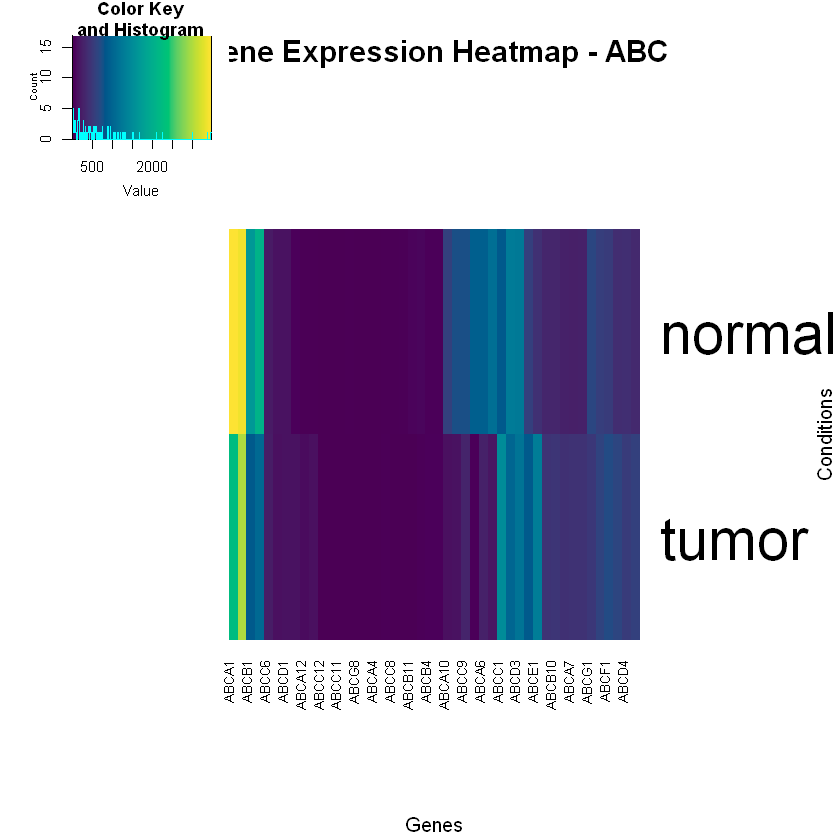

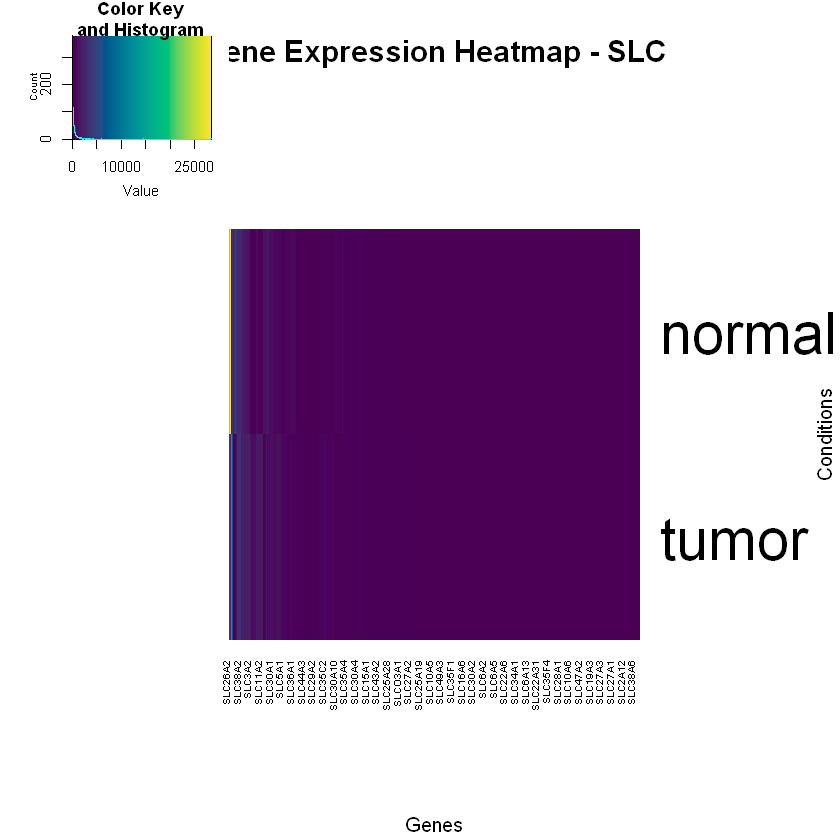

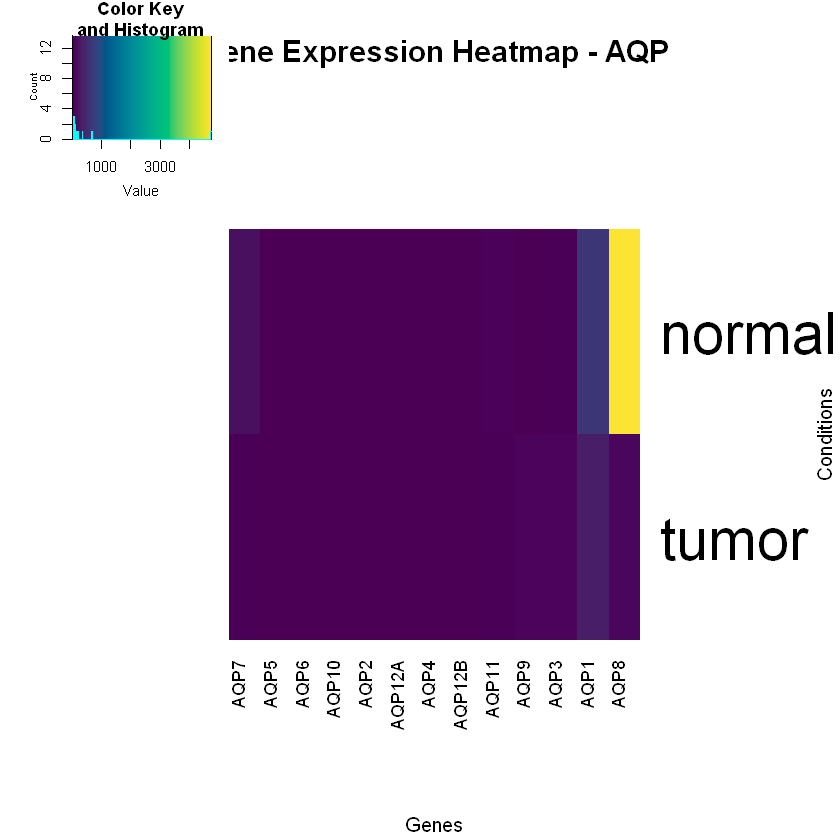

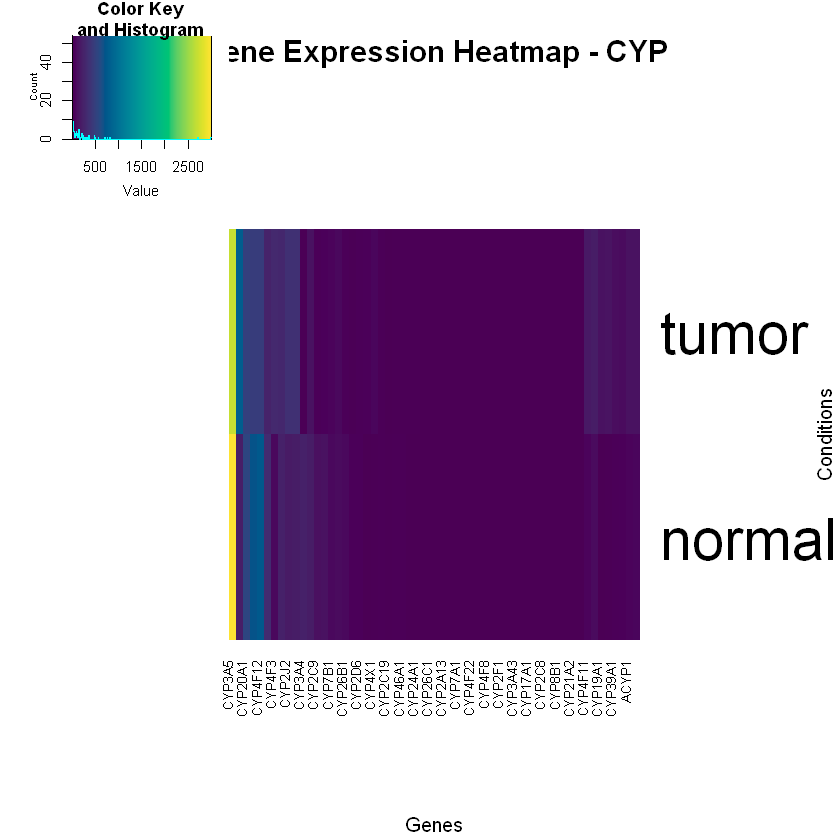

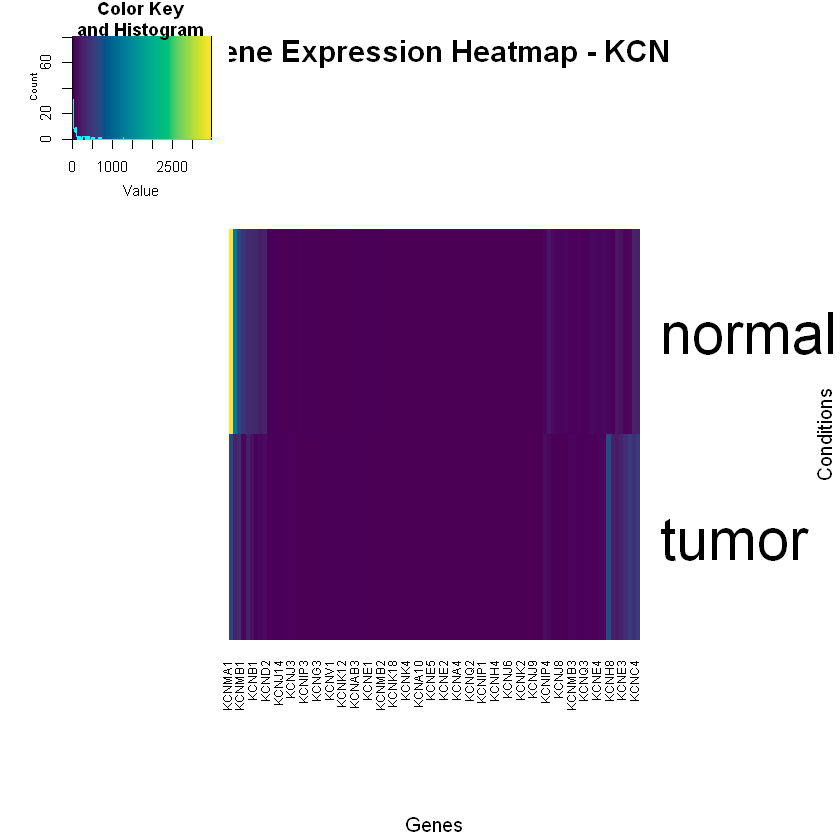

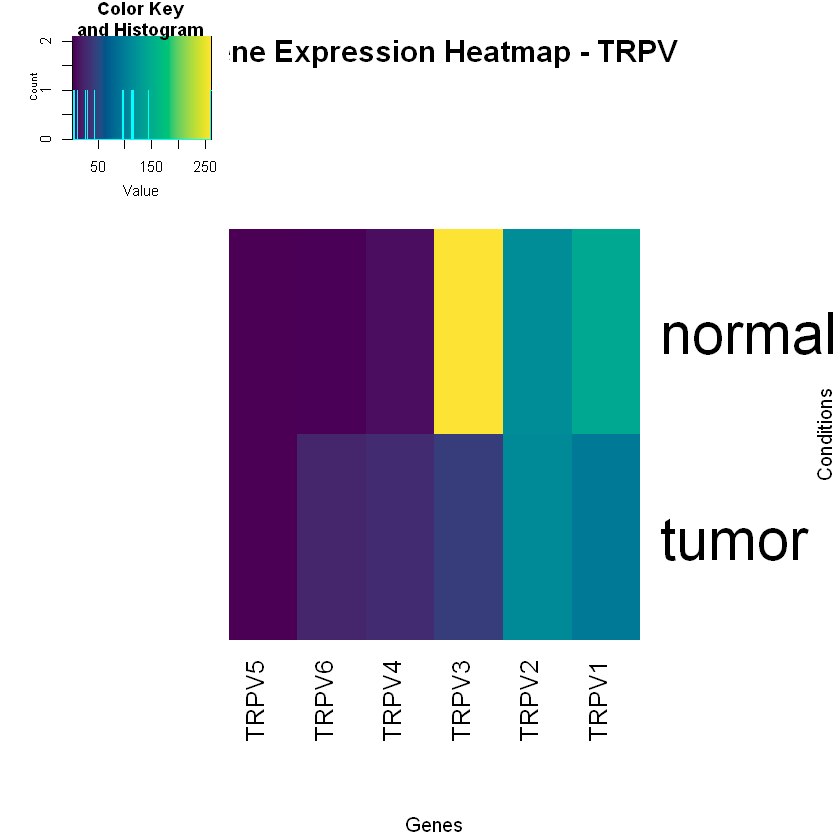

In [35]:
draw_heatmap(abc.gene_expression_data, "ABC")
draw_heatmap(slc.gene_expression_data, "SLC")
draw_heatmap(aqp.gene_expression_data, "AQP")
draw_heatmap(cyp.gene_expression_data, "CYP")
draw_heatmap(kcn.gene_expression_data, "KCN")
draw_heatmap(trpv.gene_expression_data, "TRPV")

In [36]:
selected_slc = c("SLC10A2", "SLC15A1", "SLC16A1", "SLC22A1", "SLC22A2", 
               "SLC22A3", "SLC22A4", "SLC22A5", "SLC22A6", "SLC22A7", 
               "SLC22A8", "SLC28A2", "SLC29A1", "SLC29A2", "SLC51A", 
               "SLC51B", "SLCO2B1")

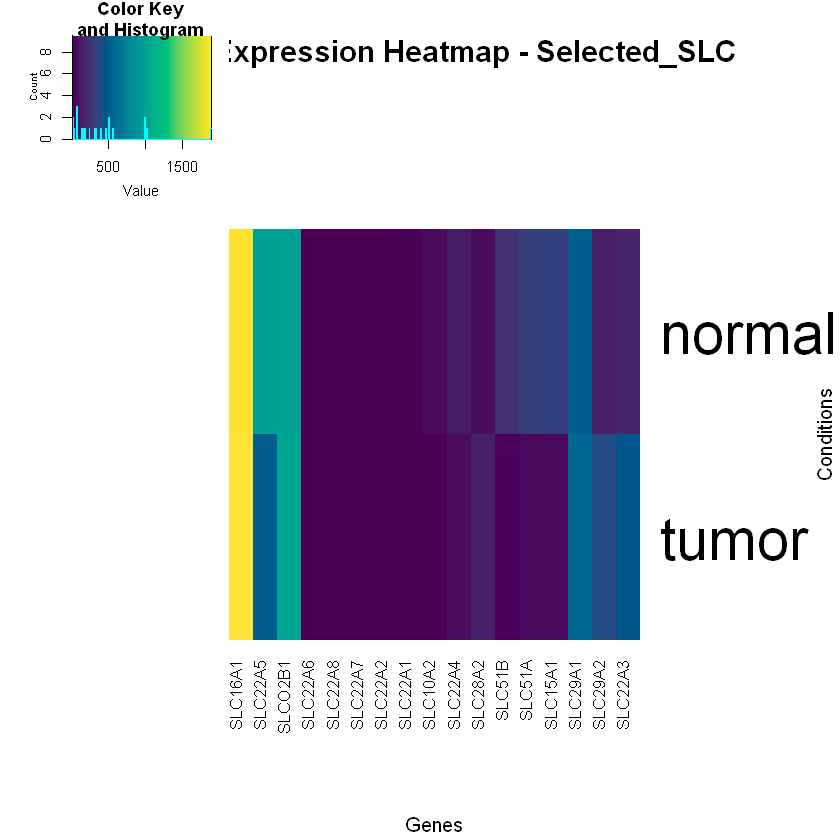

In [37]:
selected_slc.gene_expression_data <- get_gene_expression_data(dx, selected_slc)
draw_heatmap(selected_slc.gene_expression_data, "Selected_SLC")

In [38]:
abc.gene_expression_data
slc.gene_expression_data
aqp.gene_expression_data
cyp.gene_expression_data
kcn.gene_expression_data
trpv.gene_expression_data
selected_slc.gene_expression_data

,ABCB5,ABCB4,ABCC8,ABCC2,ABCF2,ABCA7,ABCC9,ABCB11,ABCB1,ABCC6,⋯,ABCE1,ABCA1,ABCA3,ABCG4,ABCD2,ABCA13,CABCOCO1,ABCB8,ABCA4,ABCF1
tumor,8.255814,77.23256,5.27907,168.90698,659.6047,449.9535,316.6047,12.18605,893.1395,248.6279,⋯,1315.605,2242.256,160.5581,2.418605,45.25581,160.2326,6.069767,426.0233,8.930233,718.6744
normal,39.977273,65.34091,22.54545,77.34091,396.9318,273.7955,756.8409,88.95455,1681.6591,233.3409,⋯,419.750,3448.545,167.0682,3.409091,97.13636,18.5000,13.750000,290.6818,8.772727,541.7500


,SLC7A2,SLC22A16,SLC25A13,SLC4A1,SLC25A5,SLC13A2,SLC6A13,SLC6A7,SLC7A14,SLC25A39,⋯,SLC12A8,SLC26A6,SLC35G4,SLC10A5,SLC22A18AS,SLC5A8,SLC35G6,SLC22A31,SLC6A14,SLC25A53
tumor,238.6744,2.232558,619.2093,2.046512,2435.512,47.16279,2.302326,129.7674,10.04651,1083.4884,⋯,338.1395,840.9070,0,86.41860,35.86047,1.302326,6.744186,9.883721,249.20930,68.83721
normal,319.2273,3.318182,366.8182,8.886364,1978.682,81.40909,4.477273,175.4545,51.31818,420.6136,⋯,68.5000,649.8182,0,89.47727,89.18182,8.227273,4.863636,2.909091,18.15909,76.18182


,AQP6,AQP8,AQP9,AQP10,AQP5,AQP7,AQP3,AQP2,AQP4,AQP11,AQP12A,AQP12B,AQP1
tumor,9.627907,137.3023,117.16279,0.5116279,23.5581395,62.90698,128.83721,2.9767442,1.953488,66.06977,4.302326,3.093023,358.4186
normal,2.500000,4723.5909,35.36364,0.4545455,0.5227273,207.34091,71.29545,0.3636364,6.613636,77.77273,5.886364,7.750000,680.3636


,CYP51A1,CYP26B1,CYP24A1,CYP3A43,CYP46A1,CYP2W1,CYP26A1,CYP2D6,CYP3A5,CYP2C18,⋯,CYP27C1,CYP4A11,CYP26C1,CYP2B6,CYP2F1,CYP2A13,CYP2A7,CYP21A2,CYP2A6,CYP3A7-CYP3A51P
tumor,114.02326,42.55814,21.441860,3.348837,13.39535,156.9535,2.8372093,41.30233,2704.837,58.81395,⋯,12.02326,1.860465,2.697674,211.0465,7.720930,0.23255814,2.186047,1.767442,3.976744,1.0930233
normal,54.09091,94.45455,3.590909,2.863636,23.56818,14.7500,0.4318182,58.47727,2994.818,147.68182,⋯,24.56818,8.363636,1.636364,110.4318,2.477273,0.04545455,3.454545,7.477273,8.772727,0.9545455


,KCNG1,KCNQ1,KCNH2,KCNAB2,KCNQ2,KCNN2,KCNK2,KCNH4,KCNK16,KCNK6,⋯,KCNH7,KCNQ5,KCNIP4,KCNK18,KCNJ11,KCNMB2,KCNRG,KCNU1,KCNJ18,KCNE1B
tumor,11.83721,539.5814,132.1860,299.4884,3.186047,16.65116,12.511628,8.860465,0.6511628,292.7907,⋯,2.720930,67.65116,117.6744,0.09302326,23.697674,16.18605,36.90698,0.1627907,0.13953488,0.3953488
normal,40.34091,115.2045,314.6136,174.5227,4.136364,31.27273,9.931818,3.727273,0.3181818,376.5000,⋯,3.431818,31.11364,190.9545,0.02272727,6.181818,14.95455,21.13636,0.2727273,0.04545455,1.1136364


,TRPV4,TRPV5,TRPV6,TRPV3,TRPV2,TRPV1
tumor,30.32558,1.372093,25.860465,43.55814,112.9535,95.67442
normal,11.59091,1.295455,5.159091,260.47727,116.7045,143.15909


,SLC10A2,SLC15A1,SLC16A1,SLC22A1,SLC22A2,SLC22A3,SLC22A4,SLC22A5,SLC22A6,SLC22A7,SLC22A8,SLC28A2,SLC29A1,SLC29A2,SLC51A,SLC51B,SLCO2B1
tumor,4.674419,67.37209,1893.372,18.65116,6.813953,461.2558,78.7907,507.9767,0.7441860,2.395349,1.6511628,152.8372,555.3023,395.1163,61.30233,29.95349,1027.0930
normal,67.818182,337.86364,1880.977,16.31818,3.522727,176.5455,128.4318,992.7273,0.3409091,1.454545,0.9318182,70.5000,508.4091,141.0000,315.70455,241.50000,991.4773


In [31]:
##Do a significance test to get only a few genes for each category
# Perform t-test for each gene

In [39]:
head(abc.gene_expression_data)

,ABCB5,ABCB4,ABCC8,ABCC2,ABCF2,ABCA7,ABCC9,ABCB11,ABCB1,ABCC6,⋯,ABCE1,ABCA1,ABCA3,ABCG4,ABCD2,ABCA13,CABCOCO1,ABCB8,ABCA4,ABCF1
tumor,8.255814,77.23256,5.27907,168.90698,659.6047,449.9535,316.6047,12.18605,893.1395,248.6279,⋯,1315.605,2242.256,160.5581,2.418605,45.25581,160.2326,6.069767,426.0233,8.930233,718.6744
normal,39.977273,65.34091,22.54545,77.34091,396.9318,273.7955,756.8409,88.95455,1681.6591,233.3409,⋯,419.750,3448.545,167.0682,3.409091,97.13636,18.5000,13.750000,290.6818,8.772727,541.7500


In [40]:
head(dx)
colnames(dx)

,tumor,normal
TSPAN6,923.62791,324.45455
TNMD,17.51163,14.72727
DPM1,340.88372,169.34091
SCYL3,374.48837,308.72727
C1orf112,232.44186,93.84091
FGR,125.44186,91.25000


[1] "tumor"  "normal"

In [58]:
df_for_ptest <- data.frame(dx)
head(df_for_ptest)

,tumor,normal
,<dbl>,<dbl>
TSPAN6,923.62791,324.45455
TNMD,17.51163,14.72727
DPM1,340.88372,169.34091
SCYL3,374.48837,308.72727
C1orf112,232.44186,93.84091
FGR,125.44186,91.25000


In [59]:
# Perform t-test for each gene for UC patient data
p_value_uc <- data.frame("pvalue" = sapply(rownames(df_for_ptest), function(gene) 
  t.test(df_for_ptest$tumor, df_for_ptest$normal)$p.value), row.names = rownames(df_for_ptest))
head(p_value_uc)

,pvalue
,<dbl>
TSPAN6,0.002513864
TNMD,0.002513864
DPM1,0.002513864
SCYL3,0.002513864
C1orf112,0.002513864
FGR,0.002513864


In [60]:
# Apply Bonferroni correction
num_tests <- nrow(p_value_uc)  # Number of tests (number of genes)
num_tests

[1] 19264

In [61]:
# # Apply Bonferroni correction to the p-values
p_values_corrected <- p.adjust(p_value_uc$pvalue, method = "bonferroni", n = num_tests)

# Add the corrected p-values to the dataframe
p_value_uc$corrected_p_value <- p_values_corrected
head(p_value_uc)

,pvalue,corrected_p_value
,<dbl>,<dbl>
TSPAN6,0.002513864,1
TNMD,0.002513864,1
DPM1,0.002513864,1
SCYL3,0.002513864,1
C1orf112,0.002513864,1
FGR,0.002513864,1


In [62]:
# Identify significant genes based on corrected p-values (e.g., corrected p < 0.05)
significant_genes_uc <- rownames(p_value_uc)[p_value_uc$corrected_p_value < 0.05]
significant_genes_uc

character(0)

In [56]:
print(significant_genes_uc)

character(0)


In [47]:
# Perform t-test for each gene for CD patient data
p_value_cd <- data.frame("pvalue" = sapply(rownames(df_for_ptest), function(gene) 
  t.test(df_for_ptest$nonIBD, df_for_ptest$CD, paired = T)$p.value), row.names = rownames(df_for_ptest))

# Apply Bonferroni correction
num_tests <- nrow(p_value_cd)  # Number of tests (number of genes)

# Apply Bonferroni correction to the p-values
p_values_corrected <- p.adjust(p_value_cd$pvalue, method = "bonferroni", n = num_tests)

# Add the corrected p-values to the dataframe
p_value_cd$corrected_p_value <- p_values_corrected

head(p_value_cd)

ERROR: Error in t.test.default(df_for_ptest$nonIBD, df_for_ptest$CD, paired = T): 'y' is missing for paired test


In [41]:
# Identify significant genes based on corrected p-values (e.g., corrected p < 0.05)
significant_genes_cd <- rownames(p_value_cd)[p_value_cd$corrected_p_value < 0.05]

In [42]:
significant_genes_cd

[1] "A1BG"            "A1CF"            "A2M"             "A2ML1"          
    [5] "A3GALT2"         "A4GALT"          "A4GNT"           "AAAS"           
    [9] "AACS"            "AADAC"           "AADACL2"         "AADACL3"        
   [13] "AADACL4"         "AADAT"           "AAGAB"           "AAK1"           
   [17] "AAMDC"           "AAMP"            "AANAT"           "AAR2"           
   [21] "AARD"            "AARS"            "AARS2"           "AARSD1"         
   [25] "AASDH"           "AASDHPPT"        "AASS"            "AATF"           
   [29] "AATK"            "ABAT"            "ABCA1"           "ABCA10"         
   [33] "ABCA12"          "ABCA13"          "ABCA2"           "ABCA3"          
   [37] "ABCA4"           "ABCA5"           "ABCA6"           "ABCA7"          
   [41] "ABCA8"           "ABCA9"           "ABCB1"           "ABCB10"         
   [45] "ABCB11"          "ABCB4"           "ABCB5"           "ABCB6"          
   [49] "ABCB7"           "ABCB8"           "ABCB9"           "ABCC1"          
   [53] "ABCC10"          "ABCC11"          "ABCC12"          "ABCC2"          
   [57] "ABCC3"           "ABCC4"           "ABCC5"           "ABCC6"          
   [61] "ABCC8"           "ABCC9"           "ABCD1"           "ABCD2"          
   [65] "ABCD3"           "ABCD4"           "ABCE1"           "ABCF1"          
   [69] "ABCF2"           "ABCF3"           "ABCG1"           "ABCG2"          
   [73] "ABCG4"           "ABCG5"           "ABCG8"           "ABHD1"          
   [77] "ABHD10"          "ABHD11"          "ABHD12"          "ABHD12B"        
   [81] "ABHD13"          "ABHD14A"         "ABHD14A-ACY1"    "ABHD14B"        
   [85] "ABHD15"          "ABHD16A"         "ABHD16B"         "ABHD17A"        
   [89] "ABHD17B"         "ABHD17C"         "ABHD2"           "ABHD3"          
   [93] "ABHD4"           "ABHD5"           "ABHD6"           "ABHD8"          
   [97] "ABI1"            "ABI2"            "ABI3"            "ABI3BP"         
  [101] "ABL1"            "ABL2"            "ABLIM1"          "ABLIM2"         
  [105] "ABLIM3"          "ABO"             "ABR"             "ABRA"           
  [109] "ABRACL"          "ABT1"            "ABTB1"           "ABTB2"          
  [113] "ACAA1"           "ACAA2"           "ACACA"           "ACACB"          
  [117] "ACAD10"          "ACAD11"          "ACAD8"           "ACAD9"          
  [121] "ACADL"           "ACADM"           "ACADS"           "ACADSB"         
  [125] "ACADVL"          "ACAN"            "ACAP1"           "ACAP2"          
  [129] "ACAP3"           "ACAT1"           "ACAT2"           "ACBD3"          
  [133] "ACBD4"           "ACBD5"           "ACBD6"           "ACBD7"          
  [137] "ACCS"            "ACCSL"           "ACD"             "ACE"            
  [141] "ACE2"            "ACER1"           "ACER2"           "ACER3"          
  [145] "ACHE"            "ACIN1"           "ACKR2"           "ACKR3"          
  [149] "ACKR4"           "ACLY"            "ACMSD"           "ACO1"           
  [153] "ACO2"            "ACOT1"           "ACOT11"          "ACOT12"         
  [157] "ACOT13"          "ACOT2"           "ACOT4"           "ACOT6"          
  [161] "ACOT7"           "ACOT8"           "ACOT9"           "ACOX1"          
  [165] "ACOX2"           "ACOX3"           "ACOXL"           "ACP1"           
  [169] "ACP2"            "ACP5"            "ACP6"            "ACPP"           
  [173] "ACR"             "ACRBP"           "ACRV1"           "ACSBG1"         
  [177] "ACSBG2"          "ACSF2"           "ACSF3"           "ACSL1"          
  [181] "ACSL3"           "ACSL4"           "ACSL5"           "ACSL6"          
  [185] "ACSM1"           "ACSM2A"          "ACSM2B"          "ACSM3"          
  [189] "ACSM4"           "ACSM5"           "ACSS1"           "ACSS2"          
  [193] "ACSS3"           "ACTA1"           "ACTA2"           "ACTB"           
  [197] "ACTBL2"          "ACTC1"           "ACTG1"           "ACTG2"          
  [2

In [45]:
significant_genes_uc

character(0)

In [46]:
##Get genes shared between the two conditions
gene.list <- intersect(significant_genes_cd, significant_genes_uc)
gene.list

character(0)